In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The entire Netflix notebook can be found here : [Netflix Visualizations, Recommendations, EDA](https://www.kaggle.com/niharika41298/netflix-visualizations-recommendation-eda)

# An analysis of the Books dataset with recommendations and visualizations.

![Books](https://images.unsplash.com/photo-1524578271613-d550eacf6090?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

The notebook contains visualizations, analysis and content based and collaborative filtering recommendation systems on the goodreads books dataset.

Upvote if you like the kernel! 😃

# INDEX

1. [Cleaning the data](#Cleaning-the-data,-removing-duplicates)
2. [Visualizing books data](#Visualizing-data)
3. [Recommendation system](#Recommendation-System)
4. [Content- Based Recommendation system](#1.-Content-Based)
5. [Collaborative Filtering Recommendation System(User Based)](#2.-Collaborative-Filtering)
6. [How many Netflix Shows/ Movies are made from books as their storylines?](#How-many-Netflix-Shows/-Movies-are-made-from-books-as-their-storylines?)

In this digital world, one form of entertainment remains constant and will always be,Books. Movies and TV shows produce a sense of instant gratification releasing dopamine which regulates bodily movements like pleasure. It not only makes us lazy but also reliant on these digital forms of entertainment. Whereas when you read a book, you have to fully indulge into it and instant entertainment will not be available. It keeps your mind running and faciliates your thinking. Read books!

# Importing Data

In [ ]:
books= pd.read_csv('/kaggle/input/goodbooks-10k/books.csv',error_bad_lines = False)

In [ ]:
books.head()

In [ ]:
books.shape

In [ ]:
ratings = pd.read_csv('/kaggle/input/goodbooks-10k/ratings.csv')

ratings.head()

In [ ]:
tags = pd.read_csv('/kaggle/input/goodbooks-10k/book_tags.csv')
tags.tail()

In [ ]:
btags = pd.read_csv('/kaggle/input/goodbooks-10k/tags.csv')
btags.tail()

# Cleaning the data, removing duplicates

**The data provided by the dataset is unclean, and they mention it clearly in the dataset description, if you wish to skip the cleaning process, head on over to the clean data available in the description of the goodbooks dataset. If you like a good challenge, use this one!**

In [ ]:
ratings=ratings.sort_values("user_id")
ratings.shape

In [ ]:
ratings.drop_duplicates(subset =["user_id","book_id"], 
                     keep = False, inplace = True) 
ratings.shape

Therefore, 4487 duplicates were present in the data, that have been removed.

Lets check for the books dataset as well.

In [ ]:
print(books.shape)
books.drop_duplicates(subset='original_title',keep=False,inplace=True)
print(books.shape)

849 rows removed.

In [ ]:
print(btags.shape)
btags.drop_duplicates(subset='tag_id',keep=False,inplace=True)
print(btags.shape)

Cool, so there are no duplicates in the book_tags dataset.

In [ ]:
print(tags.shape)
tags.drop_duplicates(subset=['tag_id','goodreads_book_id'],keep=False,inplace=True)
print(tags.shape)

# Visualizing data

In [ ]:
joint_tags=pd.merge(tags,btags,left_on='tag_id',right_on='tag_id',how='inner')

Top 10 rated books

In [ ]:
top_rated=books.sort_values('average_rating', ascending=False)
top10=top_rated.head(10)
f=['title','small_image_url']
displ=(top10[f])
displ.set_index('title', inplace=True)


In [ ]:
from IPython.display import Image, HTML

def path_to_image_html(path):
    '''
     This function essentially convert the image url to 
     '<img src="'+ path + '"/>' format. And one can put any
     formatting adjustments to control the height, aspect ratio, size etc.
     within as in the below example. 
    '''

    return '<img src="'+ path + '""/>'

HTML(displ.to_html(escape=False ,formatters=dict(small_image_url=path_to_image_html),justify='center'))

**Top 10 most popular books**

In [ ]:
pop10=books.sort_values(by='ratings_count', ascending=False)
f=['title','small_image_url']
pop10=pop10.head(10)

pop10=(pop10[f])
pop10=pop10.set_index('title')

In [ ]:
HTML(pop10.to_html(escape=False ,formatters=dict(small_image_url=path_to_image_html),justify='center'))

**Most Common Rating Values**

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.distplot(a=books['average_rating'], kde=True, color='r')

Therefore, the most common rating is somewhere between 3.5 to 4.

In [ ]:
no_of_ratings_per_book=ratings.groupby('book_id').count()

In [ ]:
no_of_ratings_per_book

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(a=no_of_ratings_per_book['rating'], color='g')

It is seen that most books have count of ratings greater than 80. That is alot of audience.

**Highly rated authors**

In [ ]:
books.head(2)

In [ ]:
f=['authors', 'average_rating']
top_authors=top_rated[f]
top_authors=top_authors.head(20)

In [ ]:
fig = px.bar(top_authors, x='authors', y='average_rating', color ='average_rating')
fig.show()

Above barplot shows the top rated authors. Bill Waterson is on the top with a whopping rating of 4.82!

**Finding popular genres and books available for those.**

So, tags are added by users and we dont have any keywords to classify the books as genres, I have hard coded the genres and checked if the tags contain those values. Credits to this approach go to : @philispp on kaggle.

In [ ]:
p=joint_tags.groupby('tag_name').count()

In [ ]:
p=p.sort_values(by='count', ascending=False)
p

Hardcoding some basic genres

In [ ]:
genres=["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics", "Comics", "Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction", "Gay and Lesbian", "Graphic Novels", "Historical Fiction", "History", "Horror", "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal", "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", "Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]
for i in range(len(genres)):
    genres[i]=genres[i].lower()

In [ ]:
new_tags=p[p.index.isin(genres)]

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=new_tags['count'],
            y=new_tags.index,
            orientation='h'))

fig.show()

There's a lot of fiction present, but not a lot of cookbooks! Makes sense.

**Analysing the relation between no of editions and ratings**

The book_count column is also available in the dataset and even though the dataset description said it was the number of editions,I was unsure what that really meant. After some research, it was clear that this was the count of all editions, translations and formats available for the books (Kindle, Paperbacks, Hard Copies etc).


In [ ]:
fig = px.line(books, y="books_count", x="average_rating", title='Book Count VS Average Rating')
fig.show()

Weirdly, it is seen that the average_rating increases with increases in number of editions of the book, but decreases after the count reaches about 2500. So, more is the number of editions, less is the average_rating.

In [ ]:
dropna= books.dropna()
fig = px.treemap(dropna, path=['original_publication_year','language_code', "average_rating"],
                  color='average_rating')
fig.show()

Thus, a lot of books were publish in the year 2011, and most of them were in English.

**Do readers prefer short titles or long titles?**

In [ ]:
books['length-title']=books['original_title'].str.len()

In [ ]:
plt.figure(figsize=(16,8))
sns.regplot(x=books['length-title'], y=books['average_rating'])

So, the highly rated books have rather short titles. The graph shows that a straight line can be plotted but very approximately to say that as the length of title increases, the rating remains constant (at around 4).

**Word Cloud for tags used by readers.**

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
text = new_tags.index.values 

wordcloud = WordCloud().generate(str(text))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
books.columns

In [ ]:
to_read=pd.read_csv("/kaggle/input/goodbooks-10k/to_read.csv")
to_r= books.merge(to_read, left_on='book_id', right_on='book_id', how='inner')

In [ ]:
to_r=to_r.groupby('original_title').count()

In [ ]:
to_r=to_r.sort_values(by='id', ascending=False)
to_r20=to_r.head(20)

**Top Books users want to read**

In [ ]:
fig = px.bar(to_r20, x=to_r20.index, y='id', color ='id')
fig.show()

Analysis of number of books in "to read" category of a user.

In [ ]:
to_read1=to_read.groupby('user_id').count()

In [ ]:
from collections import Counter
c=Counter(list(to_read1['book_id']))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=list(c.keys()), y=list(c.values()),
    mode='markers')
])

fig.show()

It can hereby be deduced that most readers keep 1 book in their to-read category and the curve decreases gradually with increase in number of users.

# Recommendation System

![Recco](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/67630/versions/6/screenshot.png)

A recommendation engine filters the data using different algorithms and recommends the most relevant items to users. There are two types of recommendation systems:
* Content Based : This approach analyzes the available content and find similarities between them and then recommendations the items obtained that have a high similarity.
* Collaborative : This approach mines or analyzes the information about users who prefer the same content and recommend the items that similar users prefer.

# 1. Content Based

Content based filtering on the following factors:

1. Title
2. Authors
3. Average rating


![Content based diagram](https://miro.medium.com/max/828/1*1b-yMSGZ1HfxvHiJCiPV7Q.png)

In [ ]:
fillnabooks= books.fillna('')

Cleaning the data - making all the words lower case

In [ ]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

Only extracting features from given data,

In [ ]:
features=['original_title','authors','average_rating']
fillednabooks=fillnabooks[features]

In [ ]:
fillednabooks = fillednabooks.astype(str)
fillednabooks.dtypes

In [ ]:
for feature in features:
    fillednabooks[feature] = fillednabooks[feature].apply(clean_data)
    
fillednabooks.head(2)

Creating a "soup" or a "bag of words" for all rows.

In [ ]:
def create_soup(x):
    return x['original_title']+ ' ' + x['authors'] + ' ' + x['average_rating']

In [ ]:
fillednabooks['soup'] = fillednabooks.apply(create_soup, axis=1)

Importing count vectorizer for term frequencies.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(fillednabooks['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
fillednabooks=fillednabooks.reset_index()
indices = pd.Series(fillednabooks.index, index=fillednabooks['original_title'])

In [ ]:
def get_recommendations_new(title, cosine_sim=cosine_sim2):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return list(books['original_title'].iloc[movie_indices])

In [ ]:
l=get_recommendations_new('The Hobbit', cosine_sim2)
fig = go.Figure(data=[go.Table(header=dict(values=l,fill_color='orange'))
                     ])
fig.show()

In [ ]:
l=get_recommendations_new('Harry Potter and The Chamber of Secrets', cosine_sim2)
fig = go.Figure(data=[go.Table(header=dict(values=l,fill_color='orange'))
                     ])
fig.show()

# 2. Collaborative Filtering

While i was learning about collaborative recommendation systems, I noticed that a lot of kernels here on kaggle are really just content based recommendation systems but are titled as collaborative. 

![Collaborative Filtering](https://cdn-images-1.medium.com/max/1000/0*gJ8CeGoD9IAHzSmb.png)

To explain collaborative filtering in simple words, consider the above users- User A and User B. 
User A and User B are considered similar users because they often bought similar or the same books in the past. Now, User A bought the Deep Learning and Neural Networks books. Therefore, when User B browses for books, he will be recommended Deep Learning and Neural Networks because User A( who User B has common interests with) bought those.

This data is very messy so dropping null values is crucial.

In [ ]:
usecols=['book_id', 'original_title']
books_col=books[usecols]

In [ ]:
books_col.dropna()

Creating Compressed sparse row matrix

In [ ]:
from scipy.sparse import csr_matrix
# pivot ratings into movie features
df_book_features = ratings.pivot(index='book_id',columns='user_id',values='rating').fillna(0)
mat_book_features = csr_matrix(df_book_features.values)

In [ ]:
df_book_features.head()

Here, K nearest neighbors algorithm is used to find the nearest book with least distance available.

In [ ]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)


num_users = len(ratings.user_id.unique())
num_items = len(ratings.book_id.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

In [ ]:
ratings=ratings.dropna()

In [ ]:
df_ratings_cnt_tmp = pd.DataFrame(ratings.groupby('rating').size(), columns=['count'])
df_ratings_cnt_tmp.head(10)

In [ ]:
total_cnt = num_users * num_items
rating_zero_cnt = total_cnt - ratings.shape[0]

df_ratings_cnt = df_ratings_cnt_tmp.append(
    pd.DataFrame({'count': rating_zero_cnt}, index=[0.0]),
    verify_integrity=True,
).sort_index()
df_ratings_cnt

After counting all ratings, it is observed that a large amount of books are rated 0 or are unrated. These need to go!

In [ ]:
import numpy as np
df_ratings_cnt['log_count'] = np.log(df_ratings_cnt['count'])
df_ratings_cnt

import matplotlib.pyplot as plt


get_ipython().run_line_magic('matplotlib', 'inline')
ax = df_ratings_cnt[['count']].reset_index().rename(columns={'index': 'rating score'}).plot(
    x='rating score',
    y='count',
    kind='bar',
    figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12,color='black'
)
ax.set_xlabel("book rating score")
ax.set_ylabel("number of ratings")



Graph clearly shows that a lot of data is irrevelant and can be removed.

In [ ]:
df_books_cnt = pd.DataFrame(ratings.groupby('book_id').size(), columns=['count'])
df_books_cnt.head()

In [ ]:
#now we need to take only books that have been rated atleast 60 times to get some idea of the reactions of users towards it

popularity_thres = 60
popular_movies = list(set(df_books_cnt.query('count >= @popularity_thres').index))
df_ratings_drop = ratings[ratings.book_id.isin(popular_movies)]
print('shape of original ratings data: ', ratings.shape)
print('shape of ratings data after dropping unpopular movies: ', df_ratings_drop.shape)

In [ ]:
# get number of ratings given by every user
df_users_cnt = pd.DataFrame(df_ratings_drop.groupby('user_id').size(), columns=['count'])
df_users_cnt.head()

Dropping users who have rated less than 50 times

In [ ]:
ratings_thres = 50
active_users = list(set(df_users_cnt.query('count >= @ratings_thres').index))
df_ratings_drop_users = df_ratings_drop[df_ratings_drop.user_id.isin(active_users)]
print('shape of original ratings data: ', ratings.shape)
print('shape of ratings data after dropping both unpopular movies and inactive users: ', df_ratings_drop_users.shape)


In [ ]:
book_user_mat = df_ratings_drop_users.pivot(index='book_id', columns='user_id', values='rating').fillna(0)
book_user_mat

In [ ]:

book_user_mat_sparse = csr_matrix(book_user_mat.values)


In [ ]:
book_user_mat_sparse

Fitting the model

In [ ]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
# fit
model_knn.fit(book_user_mat_sparse)

![](https://www.researchgate.net/profile/Bouikhalene_Belaid/publication/286477914/figure/fig3/AS:357048207331339@1462138334848/The-Majority-Voting-KNN-K6.png)

Using fuzzy logic to get nearest distance.

The term fuzzy refers to things which are not clear or are vague.In boolean system truth value, 1.0 represents absolute truth value and 0.0 represents absolute false value. But in the fuzzy system, there is no logic for absolute truth and absolute false value. But in fuzzy logic, there is intermediate value too present which is partially true and partially false.


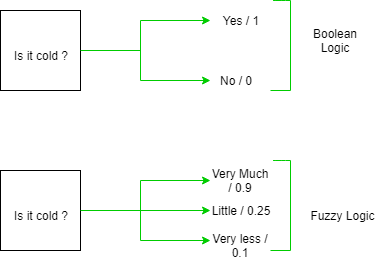

In [ ]:
from fuzzywuzzy import fuzz


# In[24]:


def fuzzy_matching(mapper, fav_book, verbose=True):
    """
    return the closest match via fuzzy ratio. 
    
    Parameters
    ----------    
    mapper: dict, map movie title name to index of the movie in data
    fav_movie: str, name of user input movie
    
    verbose: bool, print log if True
    Return
    ------
    index of the closest match
    """
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_book.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]

Writing the recommendation function.

In [ ]:
def make_recommendation(model_knn, data, mapper, fav_book, n_recommendations):
    """
    return top n similar book recommendations based on user's input book
    Parameters
    ----------
    model_knn: sklearn model, knn model
    data: book-user matrix
    mapper: dict, map book title name to index of the book in data
    fav_book: str, name of user input book
    n_recommendations: int, top n recommendations
    Return
    ------
    list of top n similar book recommendations
    """
    # fit
    model_knn.fit(data)
    # get input movie index
    print('You have input book:', fav_book)
    idx = fuzzy_matching(mapper, fav_book, verbose=True)
    
    print('Recommendation system starting to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    
    raw_recommends =         sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_book))
    rec=[]
    for i, (idx, dist) in enumerate(raw_recommends):
        if idx not in reverse_mapper.keys():
            continue
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))
        rec.append(reverse_mapper[idx])
    return rec

Time to check!

In [ ]:
my_favorite = 'To Kill a Mockingbird'
indices = pd.Series(books_col.index, index=books_col['original_title'])

In [ ]:
make_recommendation(
    model_knn=model_knn,
    data=book_user_mat_sparse,
    fav_book=my_favorite,
    mapper=indices,
    n_recommendations=10)

In [ ]:
make_recommendation(
    model_knn=model_knn,
    data=book_user_mat_sparse,
    fav_book='Harry Potter and the Chamber of Secrets',
    mapper=indices,
    n_recommendations=10)

In [ ]:
rec=make_recommendation(
    model_knn=model_knn,
    data=book_user_mat_sparse,
    fav_book='Gone Girl',
    mapper=indices,
    n_recommendations=10)

In [ ]:
rec=make_recommendation(
    model_knn=model_knn,
    data=book_user_mat_sparse,
    fav_book='Divergent',
    mapper=indices,
    n_recommendations=10)

In [ ]:
rec=make_recommendation(
    model_knn=model_knn,
    data=book_user_mat_sparse,
    fav_book='Kafka on the Shore',
    mapper=indices,
    n_recommendations=10)

In [ ]:
rec=make_recommendation(
    model_knn=model_knn,
    data=book_user_mat_sparse,
    fav_book='Kafka on the Shore',
    mapper=indices,
    n_recommendations=10)

The above is a case where the recommender could not find the book title in the data as it may have been dropped while data cleaning because it maybe had a null value, in such cases the recommender skips the book and moves forward, which is why there are only 8 recommendations for the book 'Kafka and the Shore'.

Thus, the model looks and works perfectly good.

# **How many Netflix Shows/ Movies are made from books as their storylines?**

In [ ]:
netflix=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
netflix.head()

In [ ]:
netflix.shape

In [ ]:
books['original_title']=books['original_title'].str.lower()
netflix['title']=netflix['title'].str.lower()

In [ ]:
t=netflix.merge(books, left_on='title', right_on='original_title', how="inner")

In [ ]:
t.shape

193 out of 6234 netflix shows are made from books.

In [ ]:
import plotly.graph_objects as go

labels = ['Shows from books','Shows not from books']
values = [193,6234]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

Both content based and collaborative filtering recommendation systems are implemented. I am also implementing a plotly-dash based interface for the same :)

Here is the User Interface for a book recommendation engine. Content based filtering is used because collaborative filtering requires massive storage space.

Click on the below image for the link to the repo.

[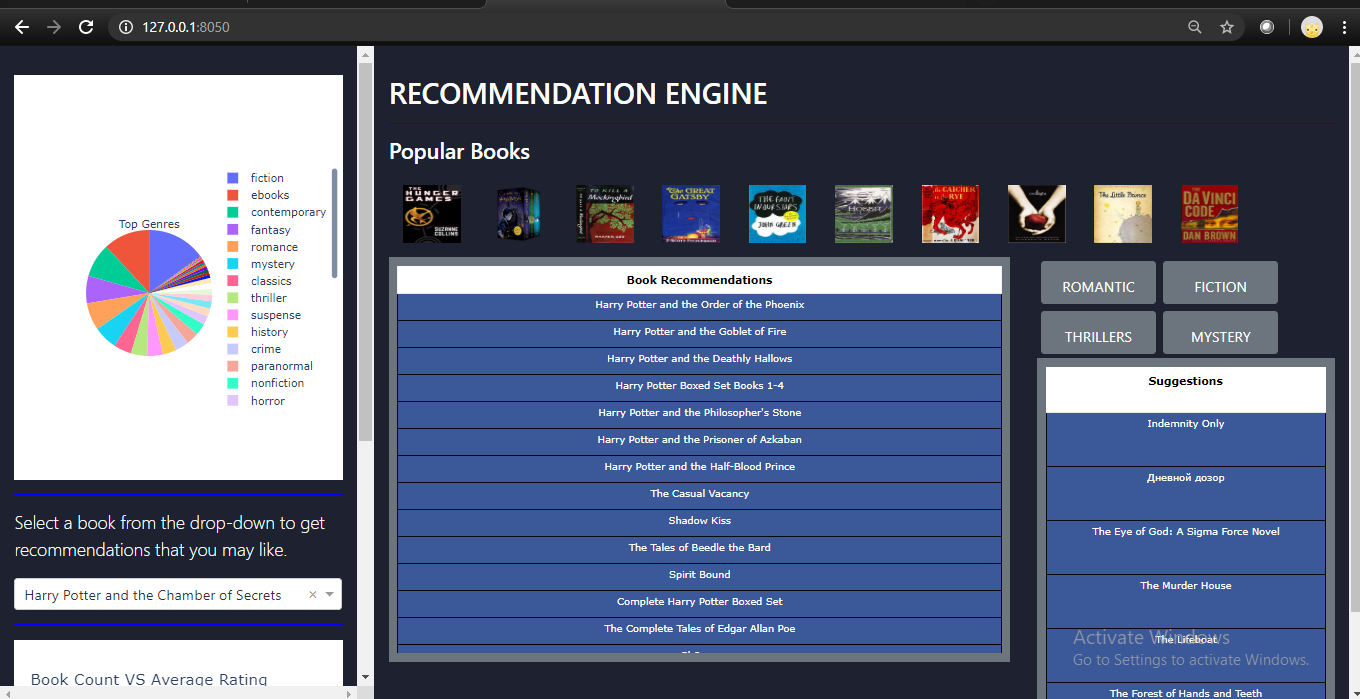](https://github.com/niharika412/recommendation-dash-app)